<a href="https://colab.research.google.com/github/iancaabreu/Projeto-1/blob/main/TCD_KNN_Risco_Card%C3%ADaco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
baseDados = pd.read_csv('dataset_risco_treino.csv')
baseDados.columns

Index(['ID', 'Idade', 'Peso', 'Altura', 'Pressao_Sistolica',
       'Pressao_Diastolica', 'Nivel_Glicose', 'Tempo_Exercicio_Semanal',
       'Consumo_Alcool_Semanal', 'Contagem_Globulos_Brancos',
       'Contagem_Globulos_Vermelhos', 'Indice_Massa_Corporal',
       'Nivel_Colesterol', 'Frequencia_Cardiaca', 'Nivel_Estresse',
       'Horas_Sono_Dia', 'Risco'],
      dtype='object')

In [ ]:
baseDados.head()

,ID,Idade,Peso,Altura,Pressao_Sistolica,Pressao_Diastolica,Nivel_Glicose,Tempo_Exercicio_Semanal,Consumo_Alcool_Semanal,Contagem_Globulos_Brancos,Contagem_Globulos_Vermelhos,Indice_Massa_Corporal,Nivel_Colesterol,Frequencia_Cardiaca,Nivel_Estresse,Horas_Sono_Dia,Risco
0,4228,66,64,157,109,70,110,11.859410,18,4737,5.068960,33.65,199,80,3,4.462193,1
1,4677,70,76,185,99,72,120,11.888231,0,10026,5.292232,34.00,230,99,3,5.381199,1
2,801,28,85,169,144,81,131,0.702209,5,10010,4.505430,27.46,193,80,4,4.250236,1
3,3672,66,72,168,122,67,76,8.632003,2,5401,5.397050,33.12,209,81,5,6.678473,1
4,4194,49,60,199,135,99,122,3.573211,10,6546,5.264416,33.78,192,72,9,4.118909,1


In [ ]:
cols = list(baseDados.columns)
cols.remove("ID")
cols.remove("Risco")

cols

['Idade',
 'Peso',
 'Altura',
 'Pressao_Sistolica',
 'Pressao_Diastolica',
 'Nivel_Glicose',
 'Tempo_Exercicio_Semanal',
 'Consumo_Alcool_Semanal',
 'Contagem_Globulos_Brancos',
 'Contagem_Globulos_Vermelhos',
 'Indice_Massa_Corporal',
 'Nivel_Colesterol',
 'Frequencia_Cardiaca',
 'Nivel_Estresse',
 'Horas_Sono_Dia']

In [ ]:
baseDados.shape

(4000, 17)

In [ ]:
baseDados.describe()

,ID,Idade,Peso,Altura,Pressao_Sistolica,Pressao_Diastolica,Nivel_Glicose,Tempo_Exercicio_Semanal,Consumo_Alcool_Semanal,Contagem_Globulos_Brancos,Contagem_Globulos_Vermelhos,Indice_Massa_Corporal,Nivel_Colesterol,Frequencia_Cardiaca,Nivel_Estresse,Horas_Sono_Dia,Risco
count,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.00000,4000.000000,4000.000000
mean,2508.711000,49.527500,80.020500,174.14075,119.331500,79.375750,109.14150,7.685217,10.152750,7474.300250,4.996882,26.506103,199.919250,79.56125,5.38625,7.040514,0.658000
std,1435.558218,17.276468,17.177918,14.35707,17.238631,11.558869,23.13913,4.323319,5.983257,1998.077954,0.289456,4.882182,29.150475,11.52241,2.84114,1.716620,0.474439
min,1.000000,20.000000,50.000000,150.00000,90.000000,60.000000,70.00000,0.004606,0.000000,4000.000000,4.500146,18.020000,150.000000,60.00000,1.00000,4.002388,0.000000
25%,1276.750000,35.000000,66.000000,162.00000,104.000000,69.000000,88.00000,4.062388,5.000000,5762.500000,4.744501,22.417500,175.000000,70.00000,3.00000,5.567238,0.000000
50%,2500.500000,49.000000,80.000000,174.00000,119.000000,79.000000,109.00000,7.742834,10.000000,7479.500000,5.000143,26.410000,201.000000,80.00000,5.00000,7.077311,1.000000
75%,3758.250000,64.000000,95.000000,186.00000,134.000000,89.000000,129.00000,11.408687,15.000000,9173.000000,5.250412,30.775000,225.000000,89.00000,8.00000,8.541280,1.000000
max,5000.000000,79.000000,109.000000,199.00000,149.000000,99.000000,149.00000,14.998515,20.000000,10999.000000,5.499808,35.000000,249.000000,99.00000,10.00000,9.997197,1.000000


In [ ]:
n_linhas = baseDados.shape[0]
print(f"A base de dados possui {n_linhas} linhas.")

target = "Risco"
proporcao = baseDados[target].value_counts(normalize=True)
print(f" Temos {proporcao[1]*100}% de pessoas que possuem risco cardíaco, equivalente a {proporcao[1] * n_linhas} linhas")
print(f" Temos {proporcao[0]*100}% de pessoas que não possuem risco cardíaco, equivalente a {proporcao[0] * n_linhas} linhas")

A base de dados possui 4000 linhas.
 Temos 65.8% de pessoas que possuem risco cardíaco, equivalente a 2632.0 linhas
 Temos 34.2% de pessoas que não possuem risco cardíaco, equivalente a 1368.0 linhas


In [ ]:
correlation_matrix = baseDados.corr()

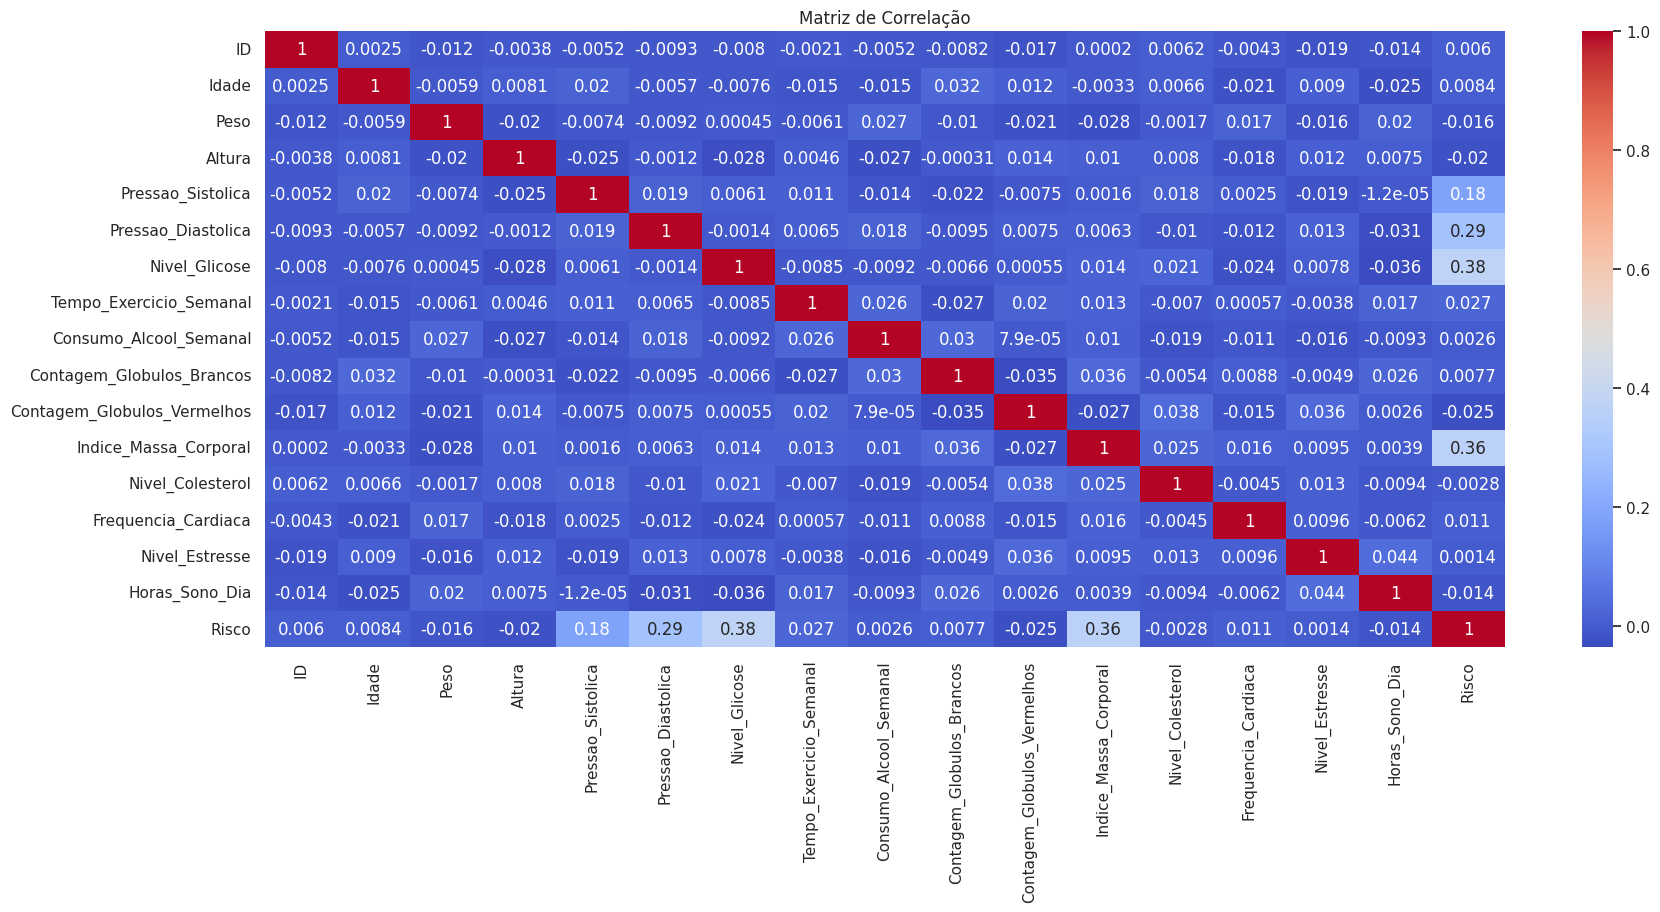

In [ ]:
plt.figure(figsize=(20,8))
chart = sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.title("Matriz de Correlação")
plt.show()

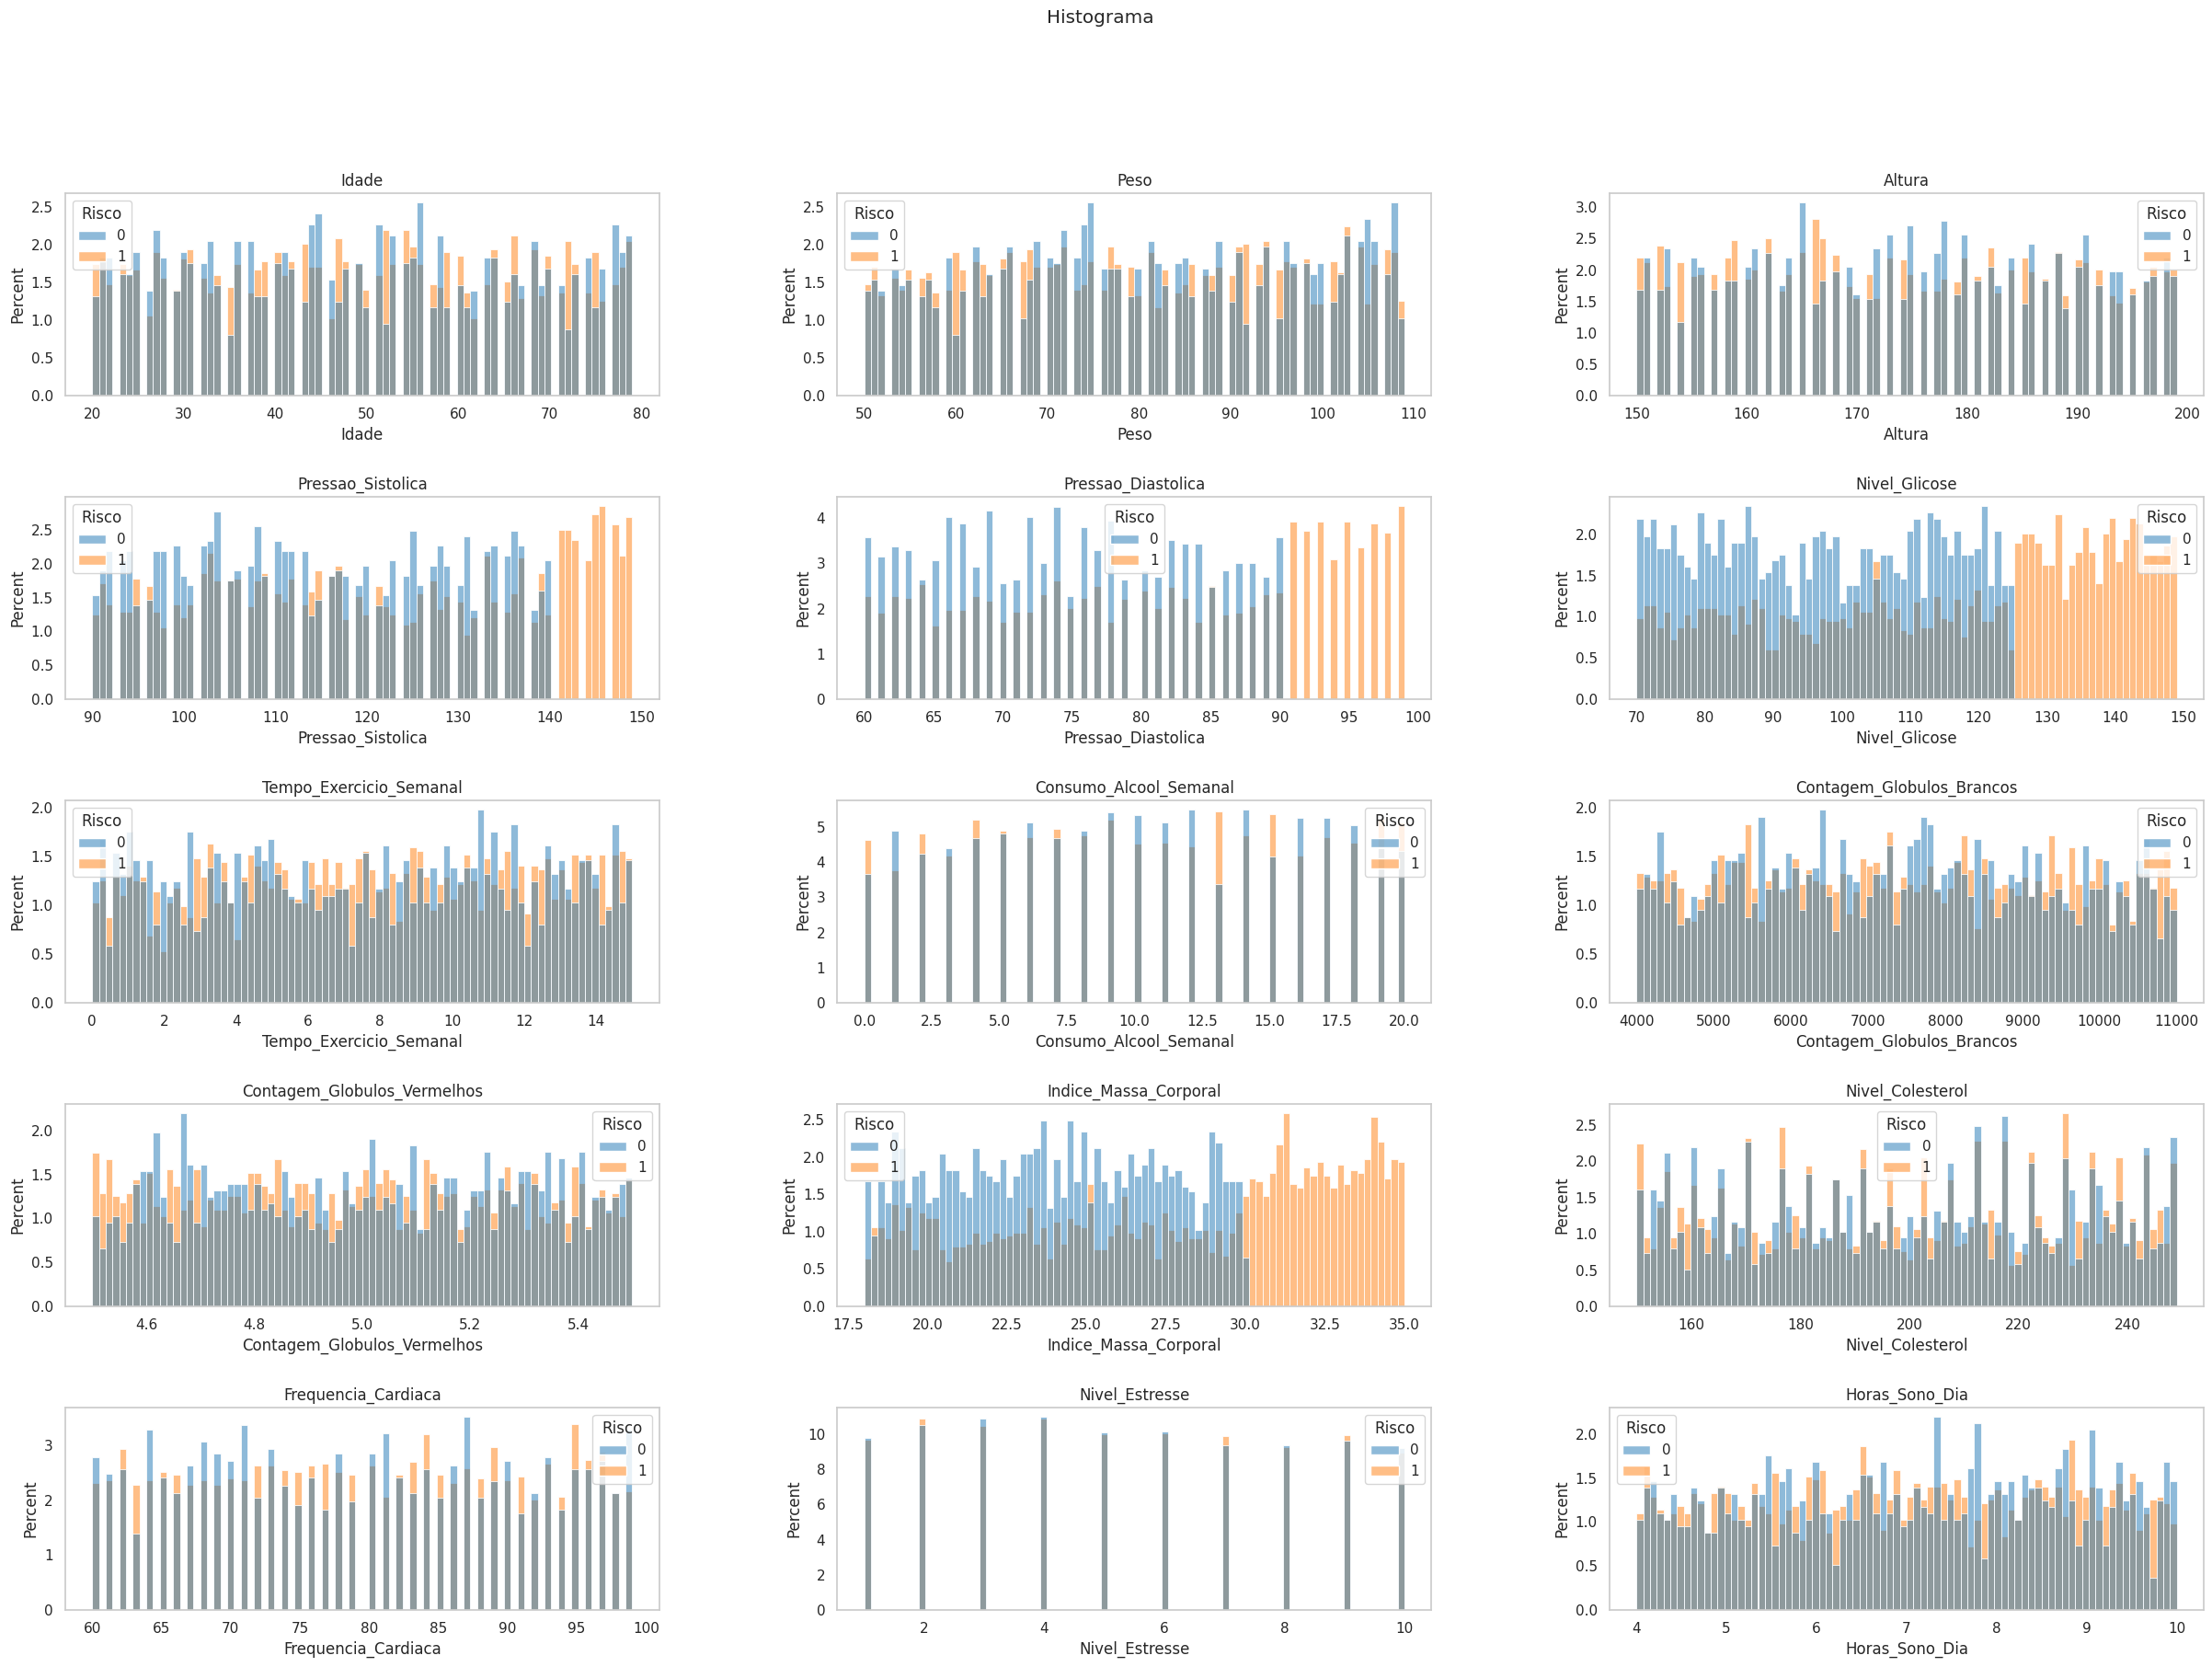

In [ ]:
num_cols = 3
num_rows = 5
total_plots = num_cols * num_rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30,20))
axes = axes.ravel()

for i, col in enumerate (cols):
  sns.histplot(data=baseDados, x= col, hue = target, bins = 80, stat = "percent", common_norm = False, ax=axes[i])
  axes[i].set_title(f"{col}")

for j in range (len(cols), num_cols*num_cols):
  axes[j].axis("off")

# Ajuste de espaçamento entre os gráficos
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.suptitle("Histograma")
plt.tight_layout
plt.show()

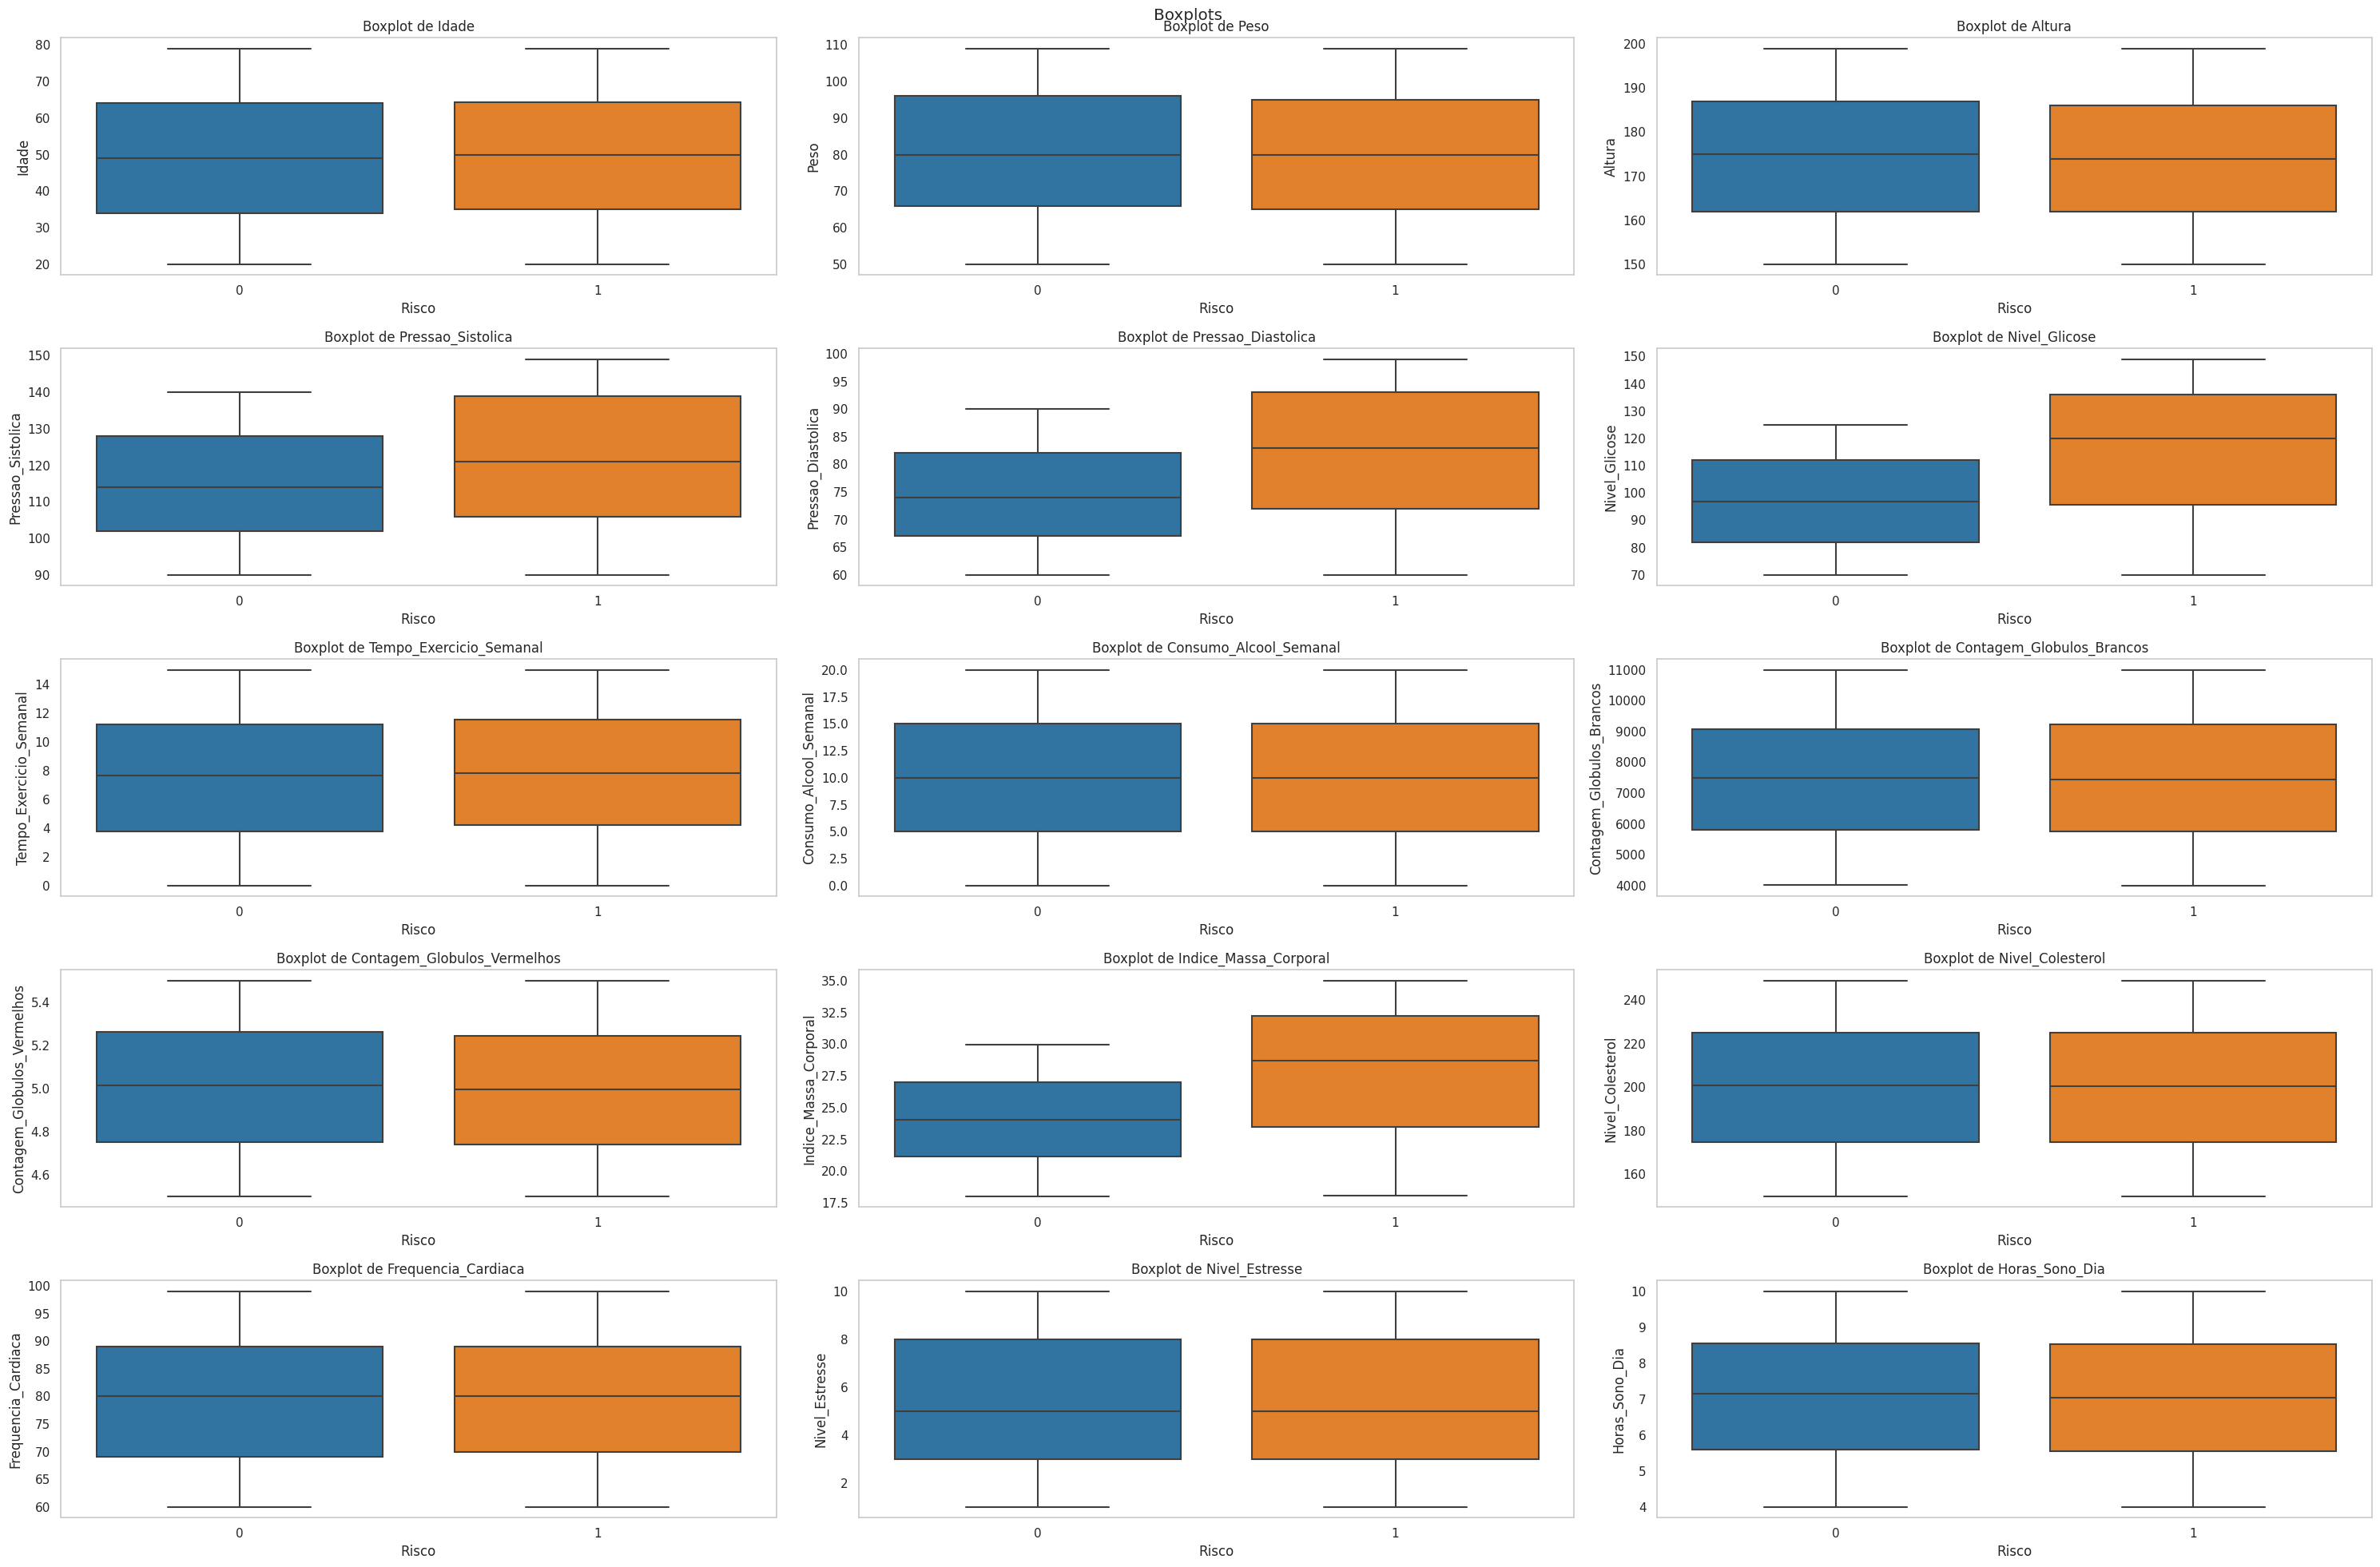

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = 3
num_rows = 5
total_plots = num_cols * num_rows

# Criação dos subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30,20))
axes = axes.ravel()

# Plotando os boxplots
for i, col in enumerate(cols):
    sns.boxplot(data=baseDados, x=target, y=col, ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")

# Desligando os eixos dos gráficos extras
for j in range(len(cols), num_cols*num_rows):
    axes[j].axis("off")

# Ajuste de espaçamento entre os gráficos
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Título principal e exibição
plt.suptitle("Boxplots")
plt.tight_layout()
plt.show()


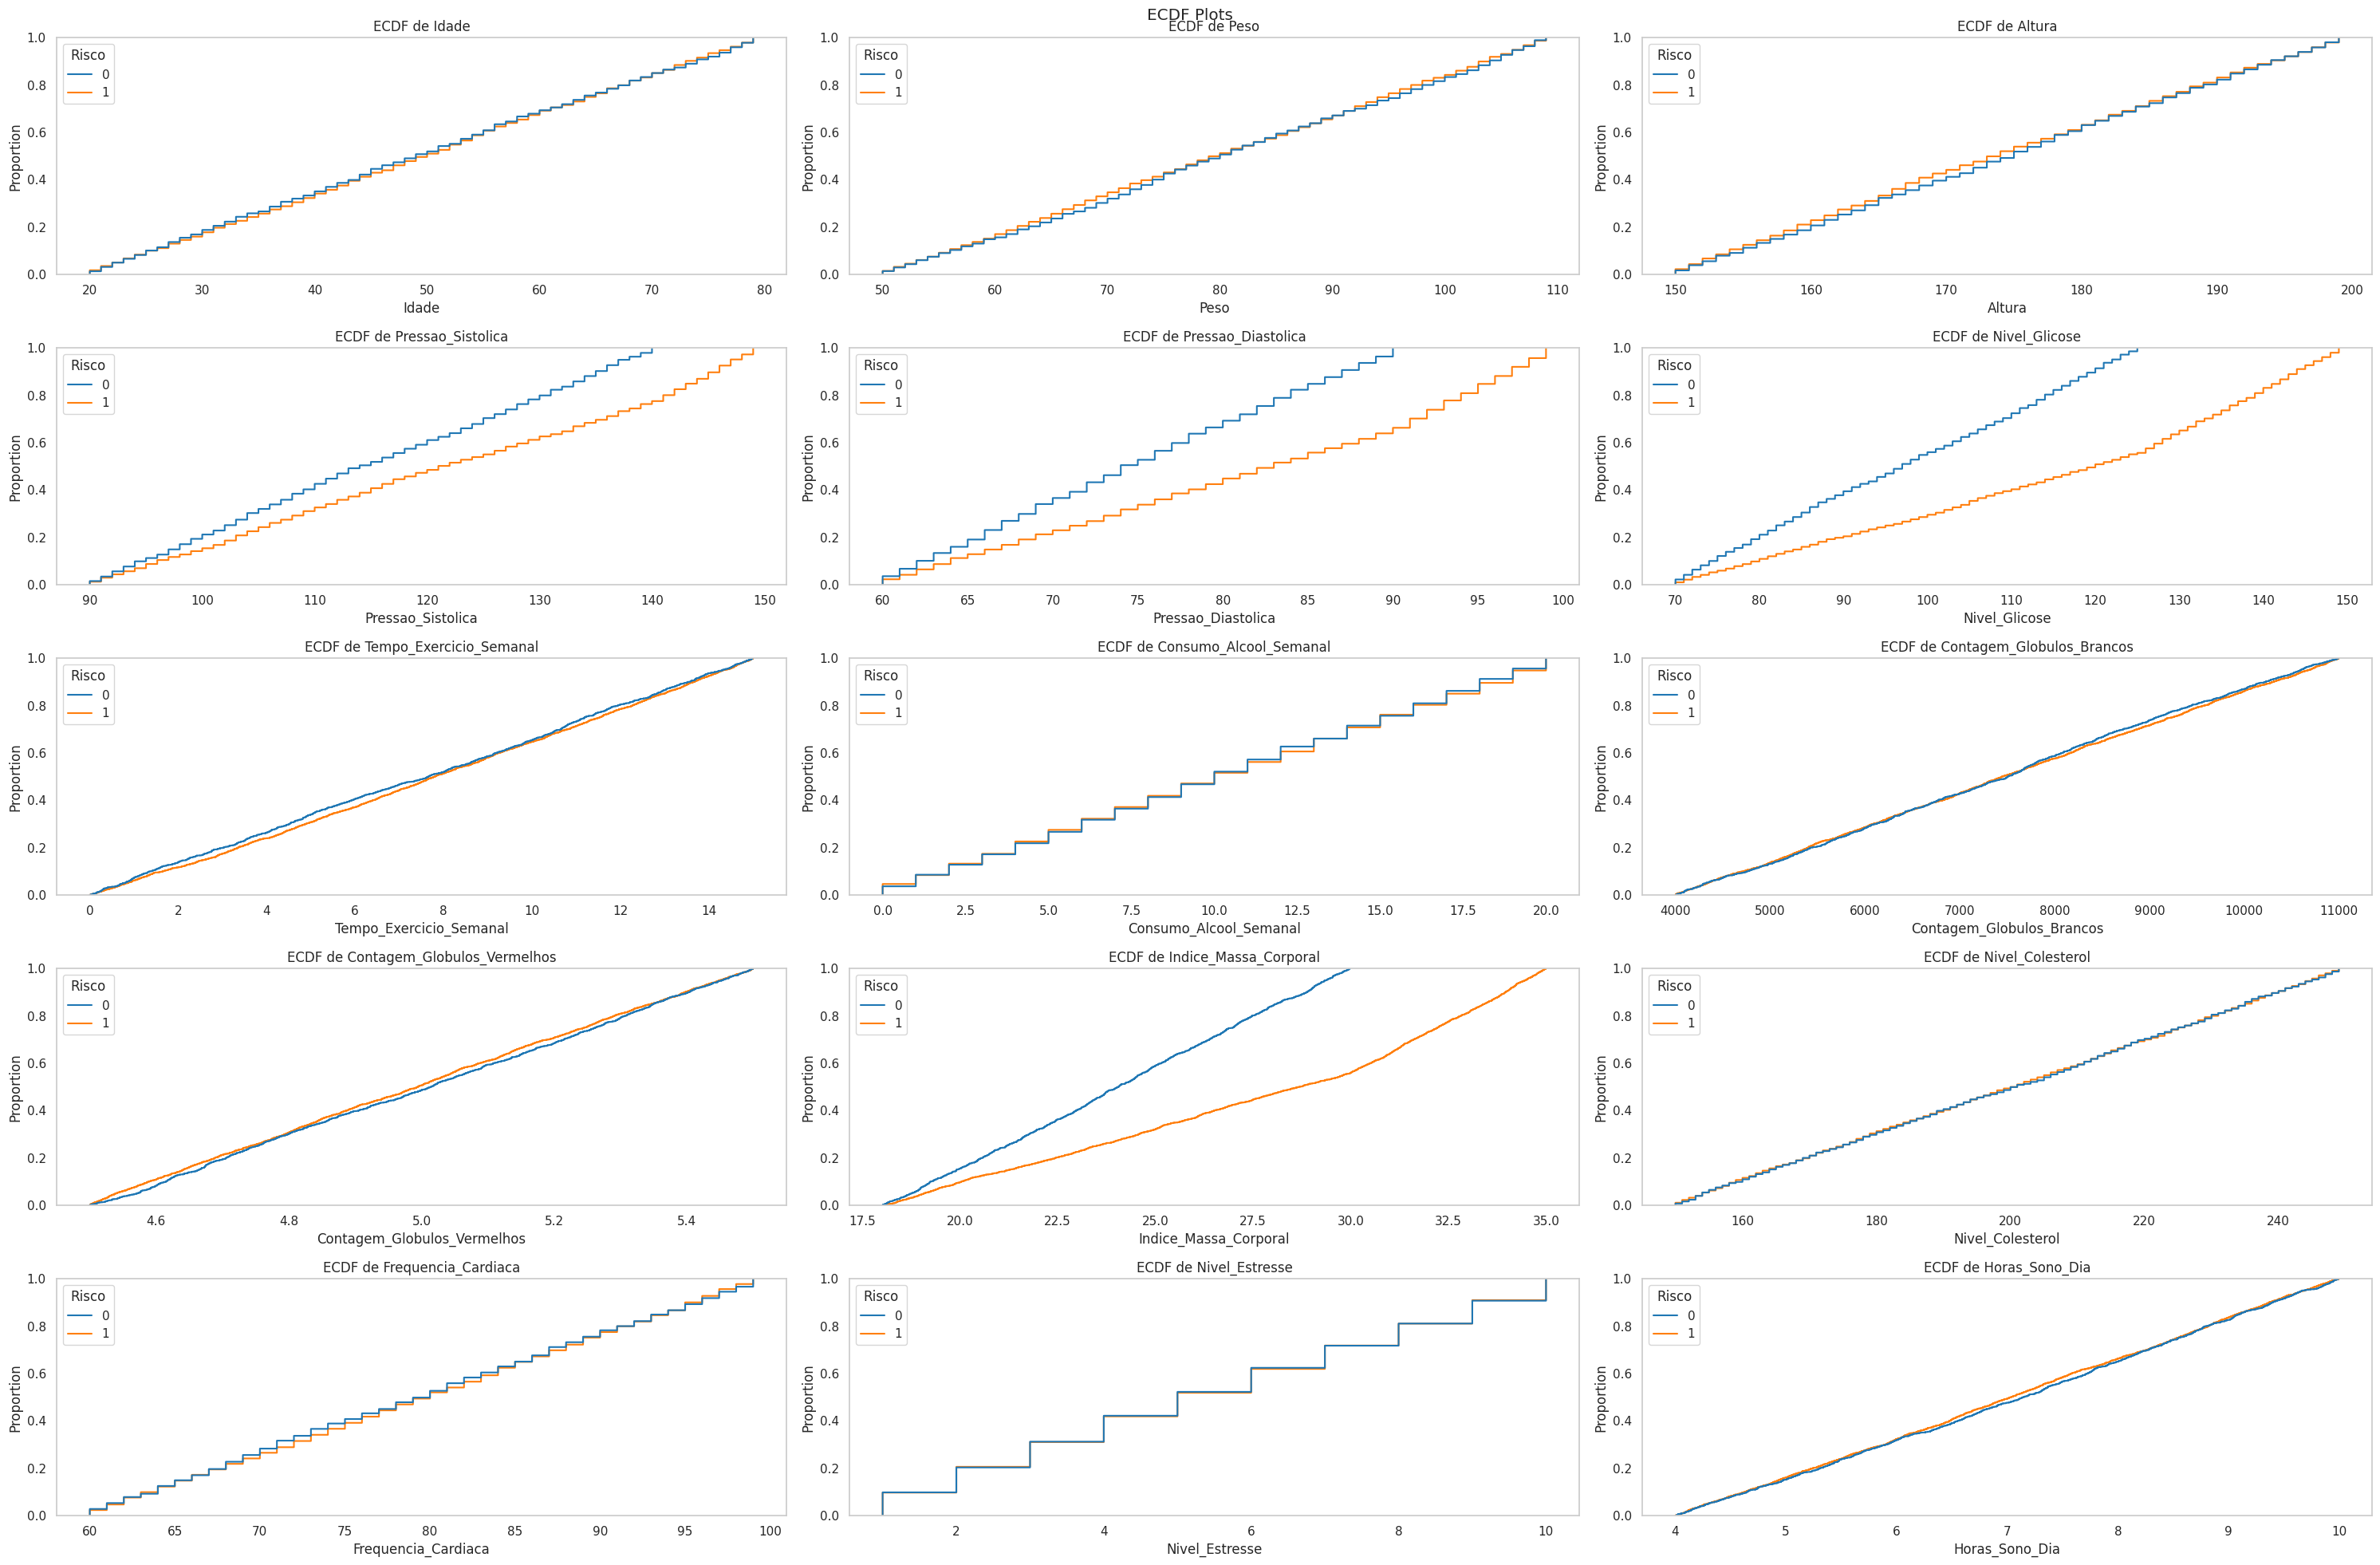

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = 3
num_rows = 5
total_plots = num_cols * num_rows

# Criação dos subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30,20))
axes = axes.ravel()

# Plotando os gráficos ECDF
for i, col in enumerate(cols):
    sns.ecdfplot(data=baseDados, x=col, hue=target, ax=axes[i])
    axes[i].set_title(f"ECDF de {col}")

# Desligando os eixos dos gráficos extras
for j in range(len(cols), num_cols*num_rows):
    axes[j].axis("off")

# Ajuste de espaçamento entre os gráficos
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Título principal e exibição
plt.suptitle("ECDF Plots")
plt.tight_layout()
plt.show()


In [ ]:
print(cols)

['Idade', 'Peso', 'Altura', 'Pressao_Sistolica', 'Pressao_Diastolica', 'Nivel_Glicose', 'Tempo_Exercicio_Semanal', 'Consumo_Alcool_Semanal', 'Contagem_Globulos_Brancos', 'Contagem_Globulos_Vermelhos', 'Indice_Massa_Corporal', 'Nivel_Colesterol', 'Frequencia_Cardiaca', 'Nivel_Estresse', 'Horas_Sono_Dia']


In [ ]:
models_cols = ['Pressao_Sistolica', 'Pressao_Diastolica', 'Nivel_Glicose', 'Indice_Massa_Corporal']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score


y = target
X = baseDados[models_cols]
y = baseDados[y]

print(X.shape)
print(y.shape)
# Modelos e parâmetros para a busca em grade
param_grid = {

}

models = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
           'n_neighbors': np.arange(1, 40, 2),
           'metric': ['euclidean', 'manhattan', 'minkowski']
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']
        }
    }

}

best_params = {}

for name, model_info in models.items():
    clf = GridSearchCV(model_info['model'], model_info['params'], cv=5,scoring='f1', return_train_score=False)
    clf.fit(X, y)

    best_params[name] = clf.best_params_

    print(f"Melhor modelo para {name}: {clf.best_params_}")
    print(f"Melhor score de validação cruzada para {name}: {clf.best_score_}")
    print("-" * 40)

# Treine os modelos usando os melhores hiperparâmetros
best_models = {
    'KNNn': KNeighborsClassifier(**best_params['KNN']),
    'Logistic Regression': LogisticRegression(**best_params['Logistic Regression'])
}


(4000, 4)
(4000,)
Melhor modelo para KNN: {'metric': 'manhattan', 'n_neighbors': 15}
Melhor score de validação cruzada para KNN: 0.9667304646990648
----------------------------------------
Melhor modelo para Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Melhor score de validação cruzada para Logistic Regression: 0.8600484853497223
----------------------------------------


In [ ]:
dados_teste = pd.read_csv('dataset_risco_teste.csv')
dados_teste.head()

,ID,Idade,Peso,Altura,Pressao_Sistolica,Pressao_Diastolica,Nivel_Glicose,Tempo_Exercicio_Semanal,Consumo_Alcool_Semanal,Contagem_Globulos_Brancos,Contagem_Globulos_Vermelhos,Indice_Massa_Corporal,Nivel_Colesterol,Frequencia_Cardiaca,Nivel_Estresse,Horas_Sono_Dia
0,1502,65,82,176,132,92,132,9.949768,6,9902,4.683295,30.94,183,64,6,9.369384
1,2587,20,61,164,127,94,133,14.948312,7,8105,4.788729,34.28,238,88,6,9.428528
2,2654,52,65,175,143,62,146,7.941973,20,9415,4.840393,22.76,193,61,5,9.047782
3,1056,61,107,188,128,97,143,5.724138,6,5398,4.513235,29.04,223,74,7,5.463413
4,706,76,54,174,129,63,140,1.598443,0,5375,4.620459,18.49,162,86,3,7.976279


In [ ]:
KNN = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 15)
KNN.fit(X,y)
# Extrair as colunas necessárias para aplicar o modelo
X_teste = dados_teste[models_cols]

# Realizar previsões com o modelo KNN
previsoes = KNN.predict(X_teste)

# Adicionar as previsões como uma coluna 'Target' no DataFrame de teste
dados_teste[target] = previsoes

# Salvar as colunas 'ID' e 'Target' em um arquivo CSV
resultado_csv = dados_teste[['ID', target]]
resultado_csv.rename(columns={target: 'Target'}, inplace=True)
resultado_csv.to_csv('resultado_KNN.csv', index=False)


In [ ]:
rl = LogisticRegression(C= 1, penalty= 'l1', solver= 'liblinear')
rl.fit(X,y)
# Extrair as colunas necessárias para aplicar o modelo
X_teste = dados_teste[models_cols]

# Realizar previsões com o modelo KNN
previsoes = rl.predict(X_teste)

# Adicionar as previsões como uma coluna 'Target' no DataFrame de teste
dados_teste['Target'] = previsoes

# Salvar as colunas 'ID' e 'Target' em um arquivo CSV
resultado_csv = dados_teste[['ID', target]]
resultado_csv.rename(columns={target: 'Target'}, inplace=True)
resultado_csv.to_csv('resultado_rl.csv', index=False)

